# scikit-learnのトレーニング♨

## Kaggleチュートリアル 編 > タイタニック生存者予測

## [目次](TableOfContents.ipynb)
- [環境準備](#環境準備)
  - [インポート](#インポート)
  - [プロキシ設定](#プロキシ設定)
  - [共通関数定義](#共通関数定義)
- [データの読込](#データの読込)
- [データの確認](#データの確認)
  - [概要確認](#概要確認)
    - [列名一覧](#列名一覧)
    - [変数説明](#変数説明)
    - [データの最初の数行を表示](#データの最初の数行を表示)
    - [データフレームの情報を表示](#データフレームの情報を表示)
    - [基本的な統計量を表示](#基本的な統計量を表示)
    - [各列の欠損値の数を表示](#各列の欠損値の数を表示)
    - [数値データの分布を確認](#数値データの分布を確認)
    - [カテゴリカル変数の可能性のある列](#カテゴリカル変数の可能性のある列)
    - [カテゴリカル変数の値のカウント](#カテゴリカル変数の値のカウント)
    - [Nameは解るケド、Ticket、Cabinって何？](#Nameは解るケド、Ticket、Cabinって何？)
      - [Name](#Name)
      - [Ticket](#Ticket)
      - [Cabin](#Cabin)
  - [詳細確認](#詳細確認)
    - [カラーパレットの定義](#カラーパレットの定義)
    - [カテゴリカルデータの頻度分析](#カテゴリカルデータの頻度分析)
    - [相関行列をヒートマップで表示](#相関行列をヒートマップで表示)
    - [数値の説明変数と目的変数の関係の確認](#数値の説明変数と目的変数の関係の確認)
      - [Age](#Age)
      - [SibSp](#SibSp)
      - [Parch](#Parch)
      - [Fare](#Fare)
    - [カテゴリカル説明変数と目的変数の関係の確認](#カテゴリカル説明変数と目的変数の関係の確認)
    - [その他の説明変数と目的変数の関係の確認](#その他の説明変数と目的変数の関係の確認)
- [データの前処理](#データの前処理)
  - [特徴量エンジニアリング](#特徴量エンジニアリング)
    - [Deck](#Deck)
    - [FamilySize](#FamilySize)
    - [TicketGroupSize](#TicketGroupSize)
    - [Title](#Title)
  - [欠損値の処理とカテゴリカル変数のエンコーディング](#欠損値の処理とカテゴリカル変数のエンコーディング)
    - [Embarkedの欠損値処理](#Embarkedの欠損値処理)
    - [カテゴリカル変数のエンコーディング](#カテゴリカル変数のエンコーディング)
    - [Ageの欠損値処理](#Ageの欠損値処理)
  - [特徴量の選択](#特徴量の選択)
  - [最終結果の確認](#最終結果の確認)
- [学習と推定](#学習と推定)
  - [データ準備](#データ準備)
  - [学習](#学習)
  - [推定](#推定)
  - [評価](#評価)

## 参考
開発基盤部会 Wiki
- Kaggle - Competitions - Getting Started - 開発基盤部会 Wiki  
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?Kaggle%20-%20Competitions%20-%20Getting%20Started

## [環境準備](ScikitLearnTraining0.ipynb)

### インポート

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

### プロキシ設定

In [3]:
import os
proxies = {
    "http": os.getenv("HTTP_PROXY"),
    "https": os.getenv("HTTPS_PROXY")
}

### 共通関数定義

## データの読込

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

## データの確認

### 概要確認

#### 列名一覧 

In [5]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### 変数説明

| 変数 | 説明 |
| ---- | ---- |
| PassengerId | 乗客者ID |
| Survived | 生存状況（0＝死亡、1＝生存） |
| Pclass | 旅客クラス（1＝1等、2＝2等、3＝3等） |
| Name | 名前 |
| Sex | 性別（male＝男性、female＝女性） |
| Age | 年齢 |
| SibSp | 同乗している兄弟（Siblings）や配偶者（Spouses）の数 |
| Parch | 同乗している親（Parents）や子供（Children）の数 |
| Ticket | チケット番号 |
| Fare | 旅客運賃 |
| Cabin | 客室番号 |
| Embarked | 出港地（C＝Cherbourg、Q＝Queenstown、S＝Southampton） |

#### データの最初の数行を表示

In [6]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### データフレームの情報を表示

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### 基本的な統計量を表示

In [8]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### 各列の欠損値の数を表示

In [9]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 数値データの分布を確認

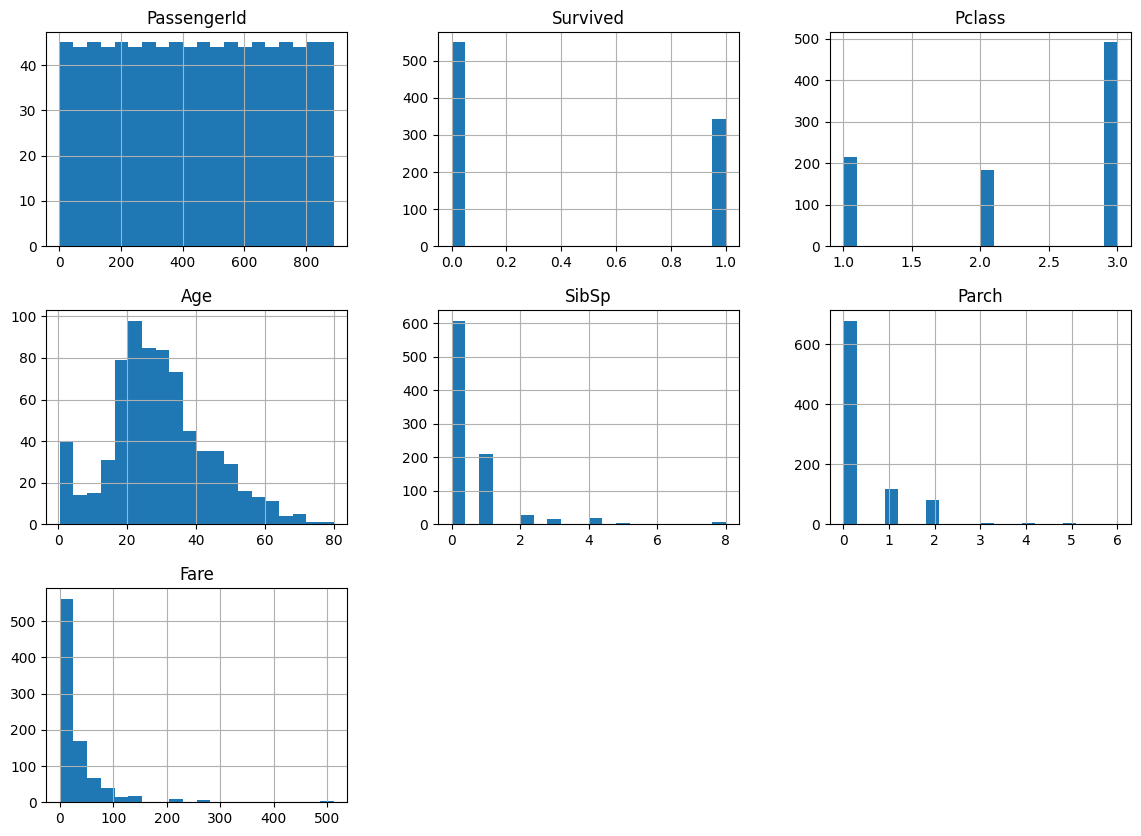

In [10]:
data.hist(bins=20, figsize=(14,10))
plt.show()

#### カテゴリカル変数の可能性のある列

In [11]:
data.select_dtypes(include=['object', 'category']).columns.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Pclassは数値なので抜けたが分布から判断可能。また、Nameは非該当、Ticket, Cabinは要確認。

#### カテゴリカル変数の値のカウント

In [12]:
categorical_columns = ['Pclass', 'Sex','Ticket', 'Cabin', 'Embarked']

for col in categorical_columns:
    print(f"\n{col} 列の値のカウント:")
    print(data[col].value_counts())


Pclass 列の値のカウント:
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex 列の値のカウント:
male      577
female    314
Name: Sex, dtype: int64

Ticket 列の値のカウント:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Cabin 列の値のカウント:
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Embarked 列の値のカウント:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### Nameは解るケド、Ticket、Cabinって何？

##### Name
- count：891、unique：891なので同姓同名は無い。
- フォーマットは「姓, 敬称. 名」となっているもよう。

In [13]:
# Name列の統計情報を確認
print('\n', data['Name'].describe(include='all'))

# Name列のデータを表示
print('\n', data['Name'].head(10))  # 先頭10行を表示

# Name列のユニークな値の数を確認
name_unique = data['Name'].unique()
print(f'\nName列のユニークな値の数: {len(name_unique)}')

# 重複のないName列の値を表示
print('\nName列のユニークな値:' + str(name_unique))


 count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

 0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Name列のユニークな値の数: 891

Name列のユニークな値:['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timoth

##### Ticket
count：891、unique：681なのでグループ化が可能と解る。

In [14]:
# Ticket列の統計情報を確認
print('\n', data['Ticket'].describe(include='all'))

# Ticket列のデータを表示
print('\n', data['Ticket'].head(10))  # 先頭10行を表示

# Ticket列のユニークな数を確認
ticket_unique = data['Ticket'].dropna().unique()
print(f'\nTicket列のユニークな値の数: {len(ticket_unique)}')

# 重複のないTicket列の値を表示
print('\nTicket列のユニークな値:' + str(ticket_unique))


 count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

 0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

Ticket列のユニークな値の数: 681

Ticket列のユニークな値:['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '3470

##### Cabin
- 先頭が一文字がデッキを表している模様。
- count：204、unique：147なのでグループ化が可能と解る。なお、欠損値も多い。

In [15]:
# Cabin列の統計情報を確認
print('\n', data['Cabin'].describe(include='all'))

# Cabin列のデータを表示
print('\n', data['Cabin'].head(10))  # 先頭10行を表示

# Cabin列の欠損値の数を確認
missing_cabin_count = data['Cabin'].isnull().sum()
print(f'\nCabin列の欠損値の数: {missing_cabin_count}')

# Cabin列の欠損値を削除しユニークな値の数を確認
cabin_unique = data['Cabin'].dropna().unique()

print(f'\nCabin列のユニークな値の数: {len(cabin_unique)}')

# 重複のないCabin列の値を表示
print('\nCabin列のユニークな値:' + str(cabin_unique))


 count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

 0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

Cabin列の欠損値の数: 687

Cabin列のユニークな値の数: 147

Cabin列のユニークな値:['C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33' 'B30'
 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' '

### 詳細確認
特徴量選択に向けての詳細確認。

#### カラーパレットの定義

In [16]:
palette = sns.color_palette('Accent', 10)

#### カテゴリカルデータの頻度分析

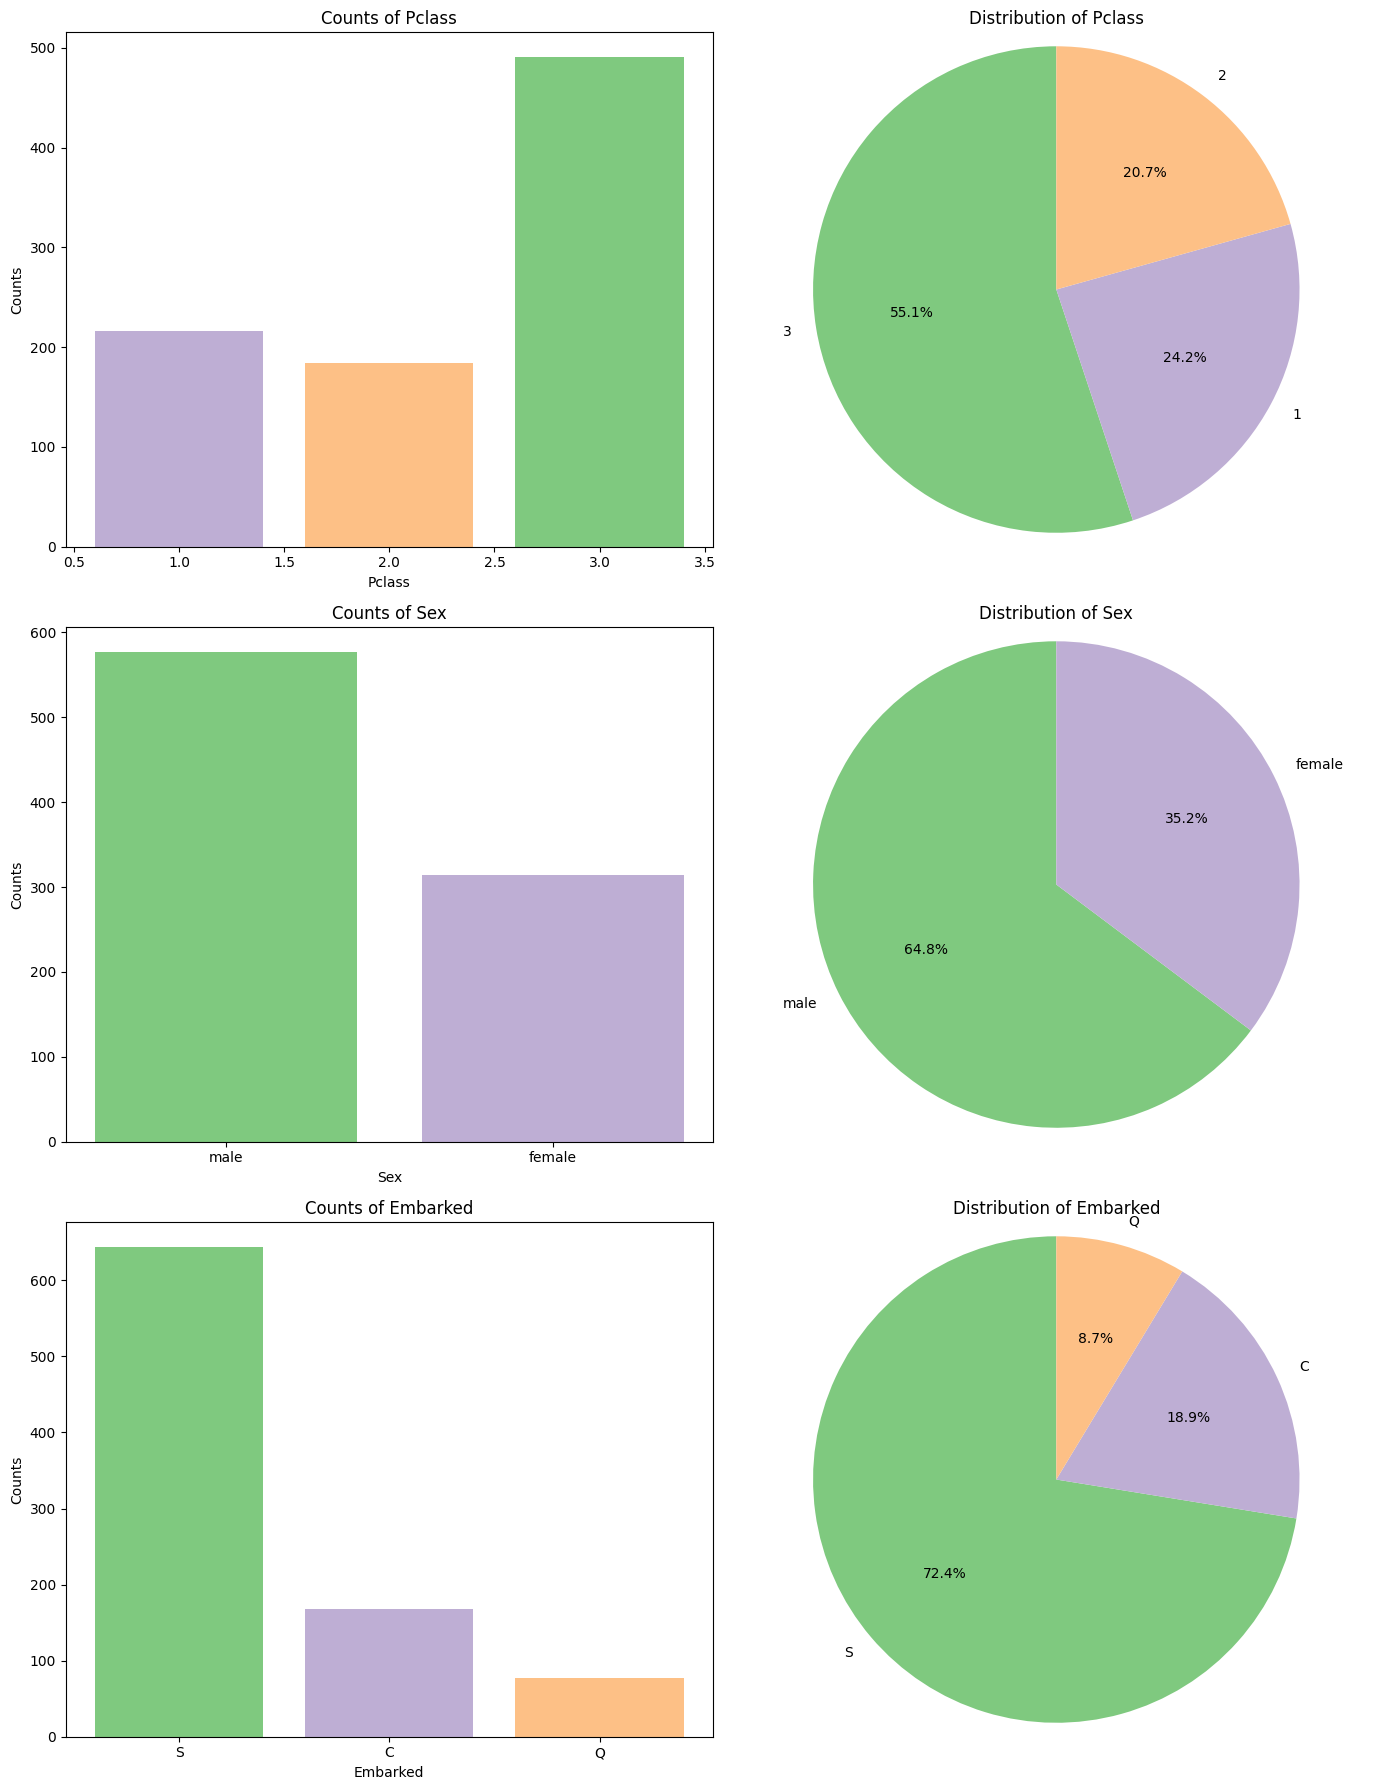

In [17]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']
'''
for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()
'''

# サブプロットの設定
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(14, 6 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    # カテゴリのカウント
    counts = data[col].value_counts()
    # 色のリストを定義
    colors = palette[:len(counts)]
    
    # 棒グラフ
    axes[i, 0].bar(counts.index, counts.values, color=colors)
    axes[i, 0].set_title(f'Counts of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Counts')
    
    # 円グラフ
    axes[i, 1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i, 1].set_title(f'Distribution of {col}')
    axes[i, 1].axis('equal')  # 円を丸くするために等軸比を設定

# レイアウト調整
plt.tight_layout()
plt.show()

#### 相関行列をヒートマップで表示
PclassとFareの相関関係が高い。

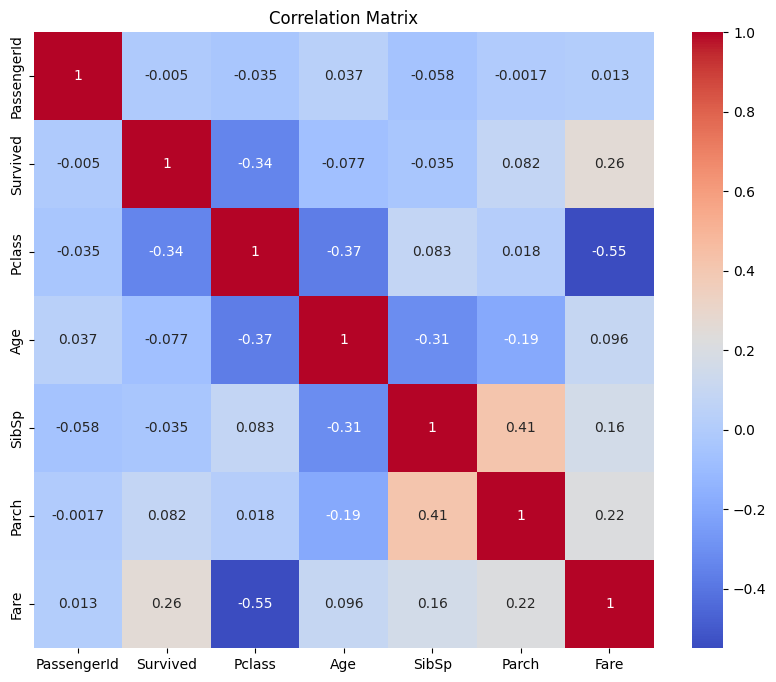

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 数値の説明変数と目的変数の関係の確認
ココのコードはGPTに生成させても使えなかったので個別に指示。

##### Survived

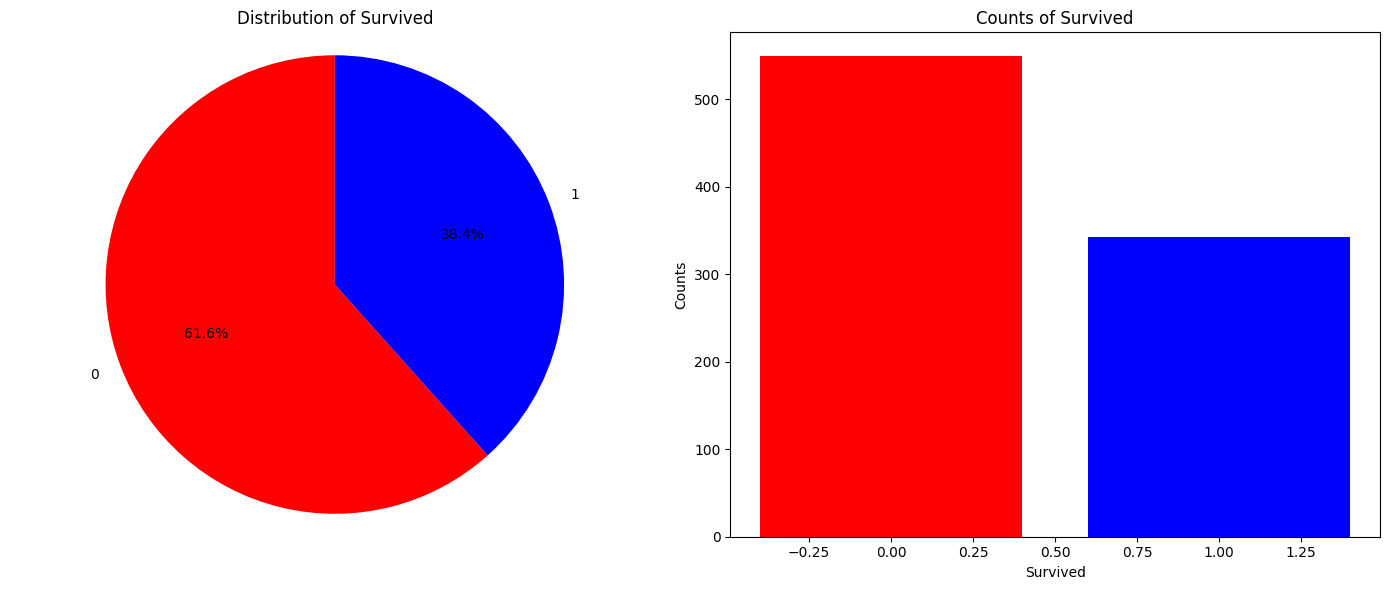

In [19]:
# 目的変数のカウント
target_column = 'Survived'
target_counts = data[target_column].value_counts()

# サブプロットの作成
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 色のリストを定義
colors = ['red', 'blue']
    
# 円グラフの作成
axes[0].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title(f'Distribution of {target_column}')
axes[0].axis('equal')  # 円を丸くするために等軸比を設定

# 棒グラフの作成
axes[1].bar(target_counts.index, target_counts.values, color=colors)
axes[1].set_title(f'Counts of {target_column}')
axes[1].set_xlabel(target_column)
axes[1].set_ylabel('Counts')

# グラフの表示
plt.tight_layout()
plt.show()

##### Age
年齢

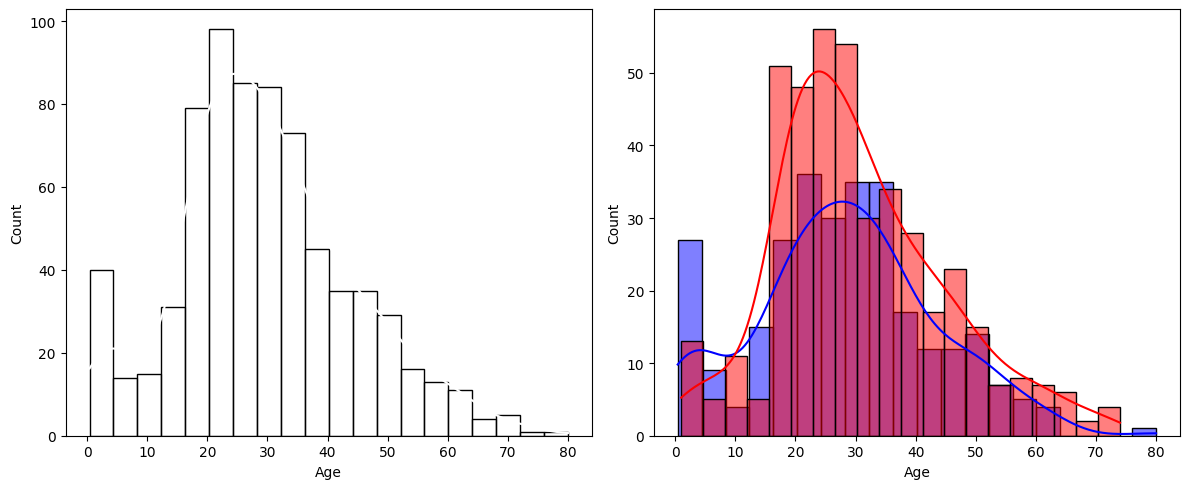

In [20]:
# サブプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 全体の年齢分布のヒストグラム
sns.histplot(data['Age'].dropna(), kde=True, color='white', bins=20, ax=axes[0])

# 生存者と死亡者の年齢分布のヒストグラム
sns.histplot(data[data['Survived'] == 1]['Age'].dropna(), kde=True, color='blue', bins=20, ax=axes[1])
sns.histplot(data[data['Survived'] == 0]['Age'].dropna(), kde=True, color='red', bins=20, ax=axes[1])

# グラフの表示
plt.tight_layout()
plt.show()

##### SibSp
同乗している兄弟（Siblings）や配偶者（Spouses）の数

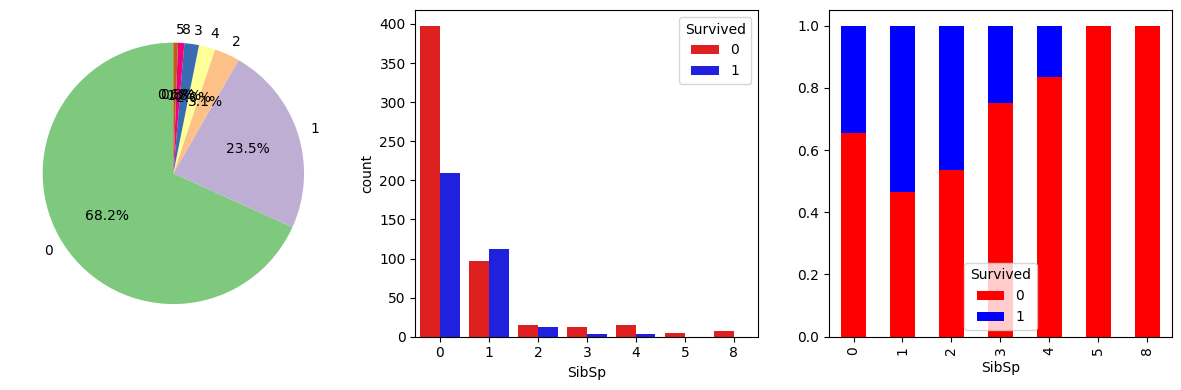

In [21]:
# 説明変数のカウント
sibsp_counts = data['SibSp'].value_counts()

# 色のリストを定義
colors = palette[:len(sibsp_counts)]

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# SibSpの構成を示す円グラフ
axes[0].pie(sibsp_counts, labels=sibsp_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# SibSpとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='SibSp', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'})

# SibSpとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['SibSp', 'Survived']).size().unstack().fillna(0)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

##### Parch
同乗している親（Parents）や子供（Children）の数

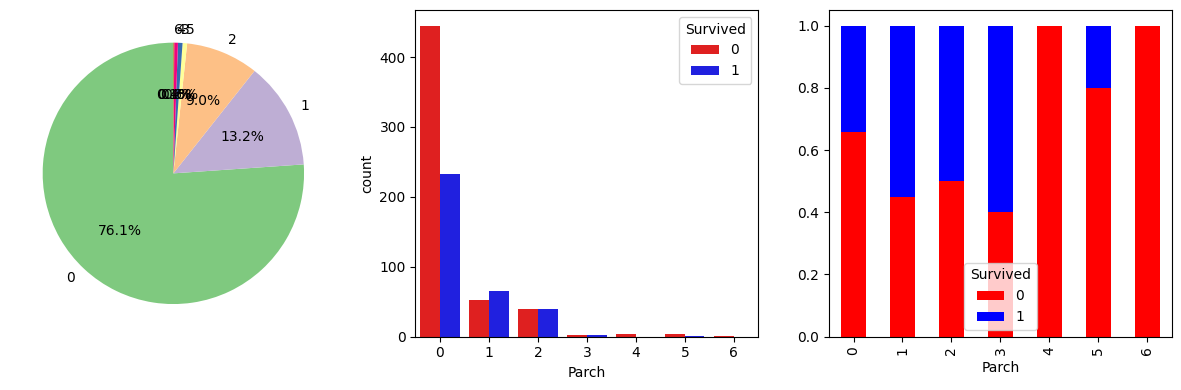

In [22]:
# 説明変数のカウント
parch_counts = data['Parch'].value_counts()

# 色のリストを定義
colors = palette[:len(parch_counts)]

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Parchの構成を示す円グラフ
axes[0].pie(parch_counts, labels=parch_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# ParchとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='Parch', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'})

# ParchとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['Parch', 'Survived']).size().unstack().fillna(0)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

##### Fare
最低の価格帯以外は生き残る確率が高い。高価格帯は顕著に高い。

###### 全体

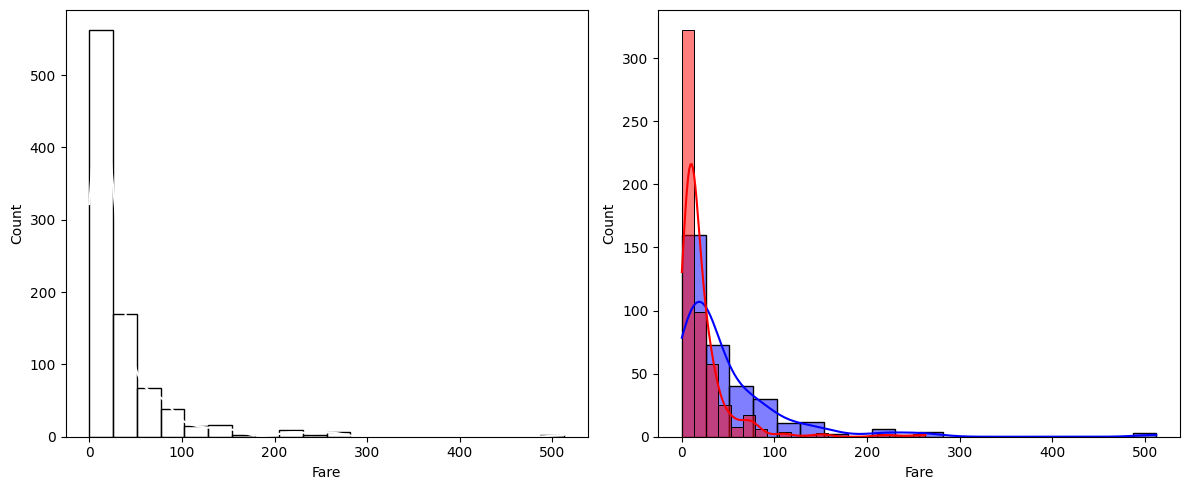

In [23]:
# サブプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 全体の旅客料金分布のヒストグラム
sns.histplot(data['Fare'].dropna(), kde=True, color='white', bins=20, ax=axes[0])

# 生存者と死亡者の旅客料金分布のヒストグラム
sns.histplot(data[data['Survived'] == 1]['Fare'].dropna(), kde=True, color='blue', bins=20, ax=axes[1])
sns.histplot(data[data['Survived'] == 0]['Fare'].dropna(), kde=True, color='red', bins=20, ax=axes[1])

# グラフの表示
plt.tight_layout()
plt.show()

###### 10ポンド以下のレコードを除外

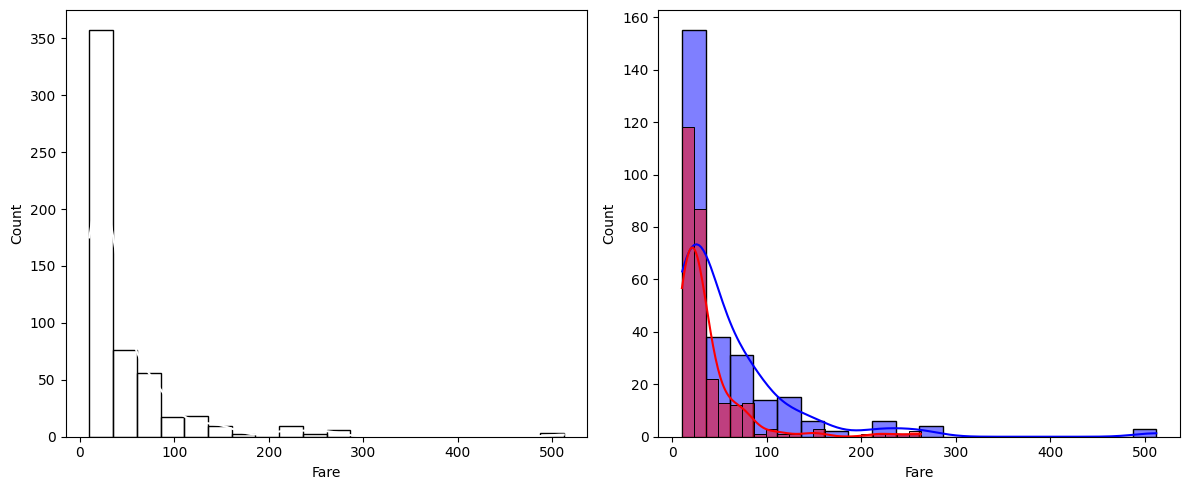

In [24]:
# サブプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 旅客料金が少ない旅客のデータを削除
threshold_fare = 10  # この値より少ない旅客のデータを削除（適宜調整）
temp = data[data['Fare'] >= threshold_fare]

# 全体の旅客料金分布のヒストグラム
sns.histplot(temp['Fare'].dropna(), kde=True, color='white', bins=20, ax=axes[0])

# 生存者と死亡者の旅客料金分布のヒストグラム
sns.histplot(temp[temp['Survived'] == 1]['Fare'].dropna(), kde=True, color='blue', bins=20, ax=axes[1])
sns.histplot(temp[temp['Survived'] == 0]['Fare'].dropna(), kde=True, color='red', bins=20, ax=axes[1])

# グラフの表示
plt.tight_layout()
plt.show()

#### カテゴリカル説明変数と目的変数の関係の確認

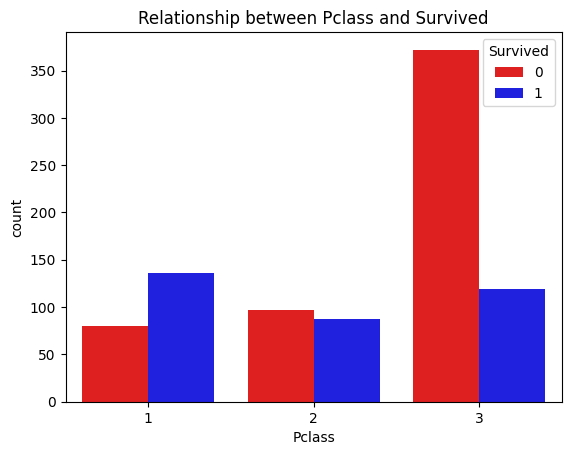

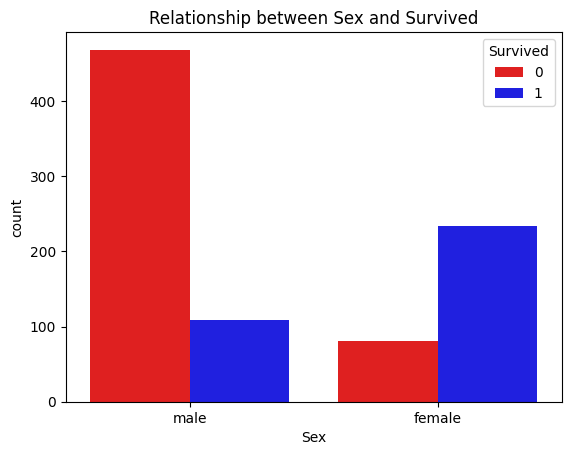

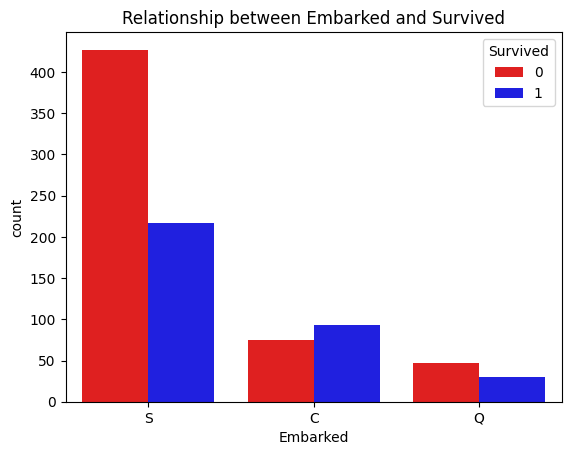

In [25]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']

for col in categorical_columns:
    sns.countplot(x=col, hue='Survived', data=data, palette={0: 'red', 1: 'blue'})
    plt.title(f'Relationship between {col} and Survived')
    plt.show()

#### その他の説明変数と目的変数の関係の確認
Cabinの先頭位置文字がデッキを表しているので、コレで分析してみる。

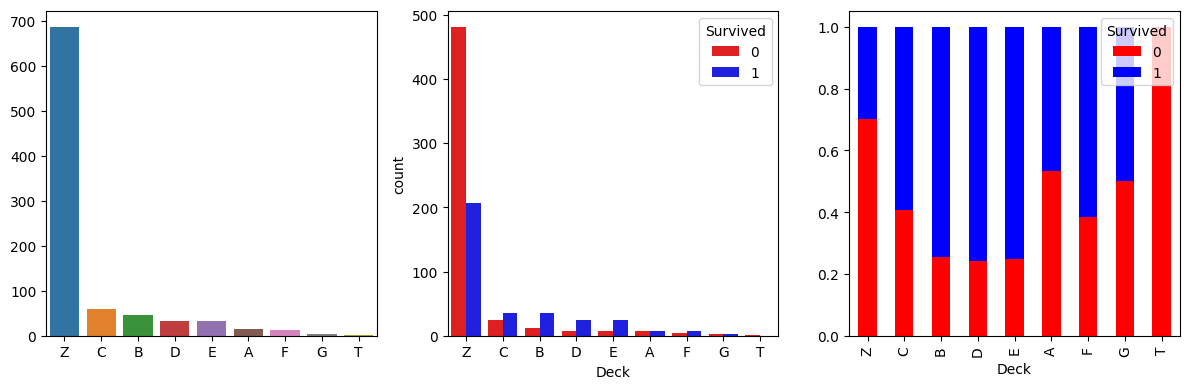

In [26]:
# Cabinの先頭の文字（デッキ）を抽出する
data['Deck'] = data['Cabin'].str[0]

# 説明変数の欠損値を保管してカウント
data['Deck'].fillna('Z', inplace=True)
deck_counts = data['Deck'].value_counts()
sorted_list = deck_counts.index.tolist()

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Deckの構成を示す棒グラフ
sns.barplot(x=deck_counts.index, y=deck_counts.values, ax=axes[0])

# DeckとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='Deck', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'}, order=sorted_list)

# DeckとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['Deck', 'Survived']).size().unstack().fillna(0)
count_data = count_data.reindex(sorted_list)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

## データの前処理
以下は確認結果（[概要確認](#概要確認)、[詳細確認](#詳細確認)）をまとめたもの。 

| 変数 | 説明 |
| ---- | ---- |
| PassengerId | 不要 |
| Survived | 目的変数 |
| Pclass | 富豪ほど生存 |
| Sex | 女性ほど生存 |
| Age | 20歳未満の生存率が高い、幼児は特に生存率が高い。 |
| SibSp | 大所帯の生存率が低い。次いで、独り身の生存率が低い。 |
| Parch | 大所帯の生存率が低い。次いで、独り身の生存率が低い。 |
| Ticket | 不要（後述の特徴量エンジニアリングで利用） |
| Fare | 最低の価格帯以外は生き残る確率が高い。高価格帯は顕著に高い（Pclassと高い相関関係） |
| Cabin | 頭文字からDeckを特徴量エンジニアリング |
| Deck | Deckは避難経路と関係し目的変数と高い相関関係を示す。 |
| Embarked | C=Cherbourg、Q＝Queenstown、S＝Southamptonのうち、Southamptonが優遇されているが、間接的な影響の可能性 |

In [27]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Deck']

### 特徴量エンジニアリング

#### Deck
[データ分析で追加したDeck](#その他の説明変数と目的変数の関係の確認)はそのまま流用

#### FamilySize
FamilySizeを追加

In [28]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

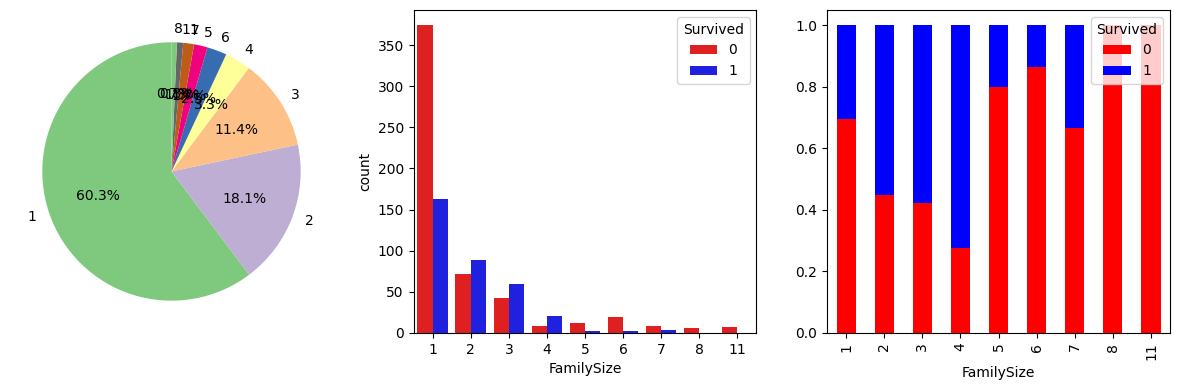

In [29]:
# 説明変数のカウント
familysize_counts = data['FamilySize'].value_counts()

# 色のリストを定義
colors = palette[:len(familysize_counts)]

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# FamilySizeの構成を示す円グラフ
axes[0].pie(familysize_counts, labels=familysize_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# FamilySizeとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='FamilySize', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'})

# FamilySizeとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['FamilySize', 'Survived']).size().unstack().fillna(0)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

#### TicketGroupSize
TicketGroupSizeを追加

In [30]:
Ticket_Count = dict(data['Ticket'].value_counts())
data['TicketGroupSize'] = data['Ticket'].map(Ticket_Count)

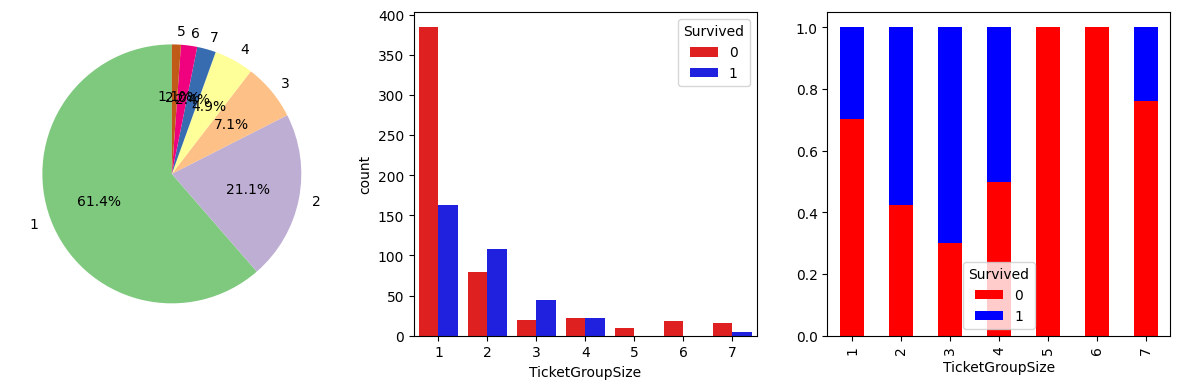

In [31]:
# 説明変数のカウント
tgsize_counts = data['TicketGroupSize'].value_counts()

# 色のリストを定義
colors = palette[:len(tgsize_counts)]

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# TicketGroupSizeの構成を示す円グラフ
axes[0].pie(tgsize_counts, labels=tgsize_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# TicketGroupSizeとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='TicketGroupSize', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'})

# TicketGroupSizeとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['TicketGroupSize', 'Survived']).size().unstack().fillna(0)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

#### Title
名前から敬称を抽出

In [32]:
# Nameのフォーマット（姓, 敬称. 名）的に、[,] [.]の間が敬称
data['Title'] = data['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer', inplace=True)
data['Title'].replace(['Don', 'Sir',  'the Countess', 'Lady', 'Dona'], 'Royalty', inplace=True)
data['Title'].replace(['Mme', 'Ms'], 'Mrs', inplace=True)
data['Title'].replace(['Mlle'], 'Miss', inplace=True)
data['Title'].replace(['Jonkheer'], 'Master', inplace=True)

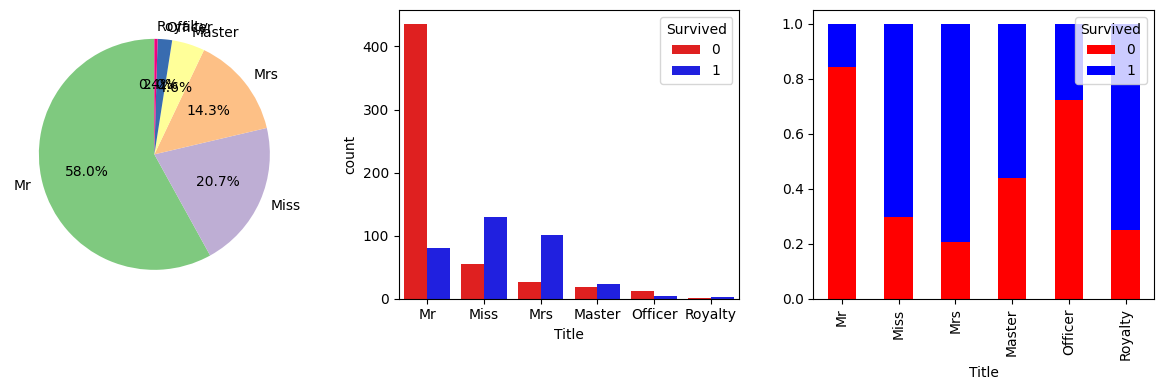

In [33]:
# 説明変数のカウント
title_counts = data['Title'].value_counts()
sorted_list = title_counts.index.tolist()

# 色のリストを定義
colors = palette[:len(title_counts)]

# サブプロットを作成
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Titleの構成を示す円グラフ
axes[0].pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# TitleとSurvivedの関連を分析した集合縦棒グラフ
sns.countplot(x='Title', hue='Survived', data=data, ax=axes[1], palette={0: 'red', 1: 'blue'}, order=sorted_list)

# TitleとSurvivedの関連を分析した積み上げ縦棒グラフ
count_data = data.groupby(['Title', 'Survived']).size().unstack().fillna(0)
count_data = count_data.reindex(sorted_list)
count_data_ratio = count_data.div(count_data.sum(axis=1), axis=0)
count_data_ratio.plot(kind='bar', stacked=True, ax=axes[2], color=['red', 'blue'])

# グラフの表示
plt.tight_layout()
plt.show()

### 欠損値の処理とカテゴリカル変数のエンコーディング
- エンコーディング前に欠損値の処理が必要。
- エンコーディング結果を欠損値の処理で使いたい。

#### Cabinの欠損値処理
[Deckの特徴量エンジニアリング](#Deck)時に補完済み

#### Embarkedの欠損値処理
最頻値で補完

In [34]:
data["Embarked"].fillna(data['Embarked'].mode()[0], inplace=True)

#### カテゴリカル変数のエンコーディング

In [35]:
refuge = data.copy() # 退避
data = pd.get_dummies(data, columns=['Sex', 'Deck', 'Embarked', 'Title'], drop_first=True)

#### Ageの欠損値処理
推定する

In [36]:
#data["Age"].fillna(data["Age"].mean(), inplace=True) # 平均で補完

# 推定に使用する項目を指定
temp = data[['Age','Pclass','Sex_male','Parch','SibSp','Title_Miss','Title_Mr','Title_Mrs','Title_Officer','Title_Royalty']]

# ラベル特徴量をワンホットエンコーディング
temp = pd.get_dummies(temp)

# 学習データとテストデータに分離し、numpyに変換
known_age = temp[temp.Age.notnull()].values  
unknown_age = temp[temp.Age.isnull()].values

# 学習データをX, yに分離
X = known_age[:, 1:]  
y = known_age[:, 0]

# ランダムフォレストで推定モデルを構築
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

# 推定モデルを使って、テストデータのAgeを予測し、補完
predictedAges = rfr.predict(unknown_age[:, 1::])
data.loc[(data.Age.isnull()), 'Age'] = predictedAges 

In [37]:
print(data.isnull().sum())

PassengerId          0
Survived             0
Pclass               0
Name                 0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
FamilySize           0
TicketGroupSize      0
Sex_male             0
Deck_B               0
Deck_C               0
Deck_D               0
Deck_E               0
Deck_F               0
Deck_G               0
Deck_T               0
Deck_Z               0
Embarked_Q           0
Embarked_S           0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Officer        0
Title_Royalty        0
dtype: int64


### デッドリスト、サバイブリスト
分析により、氏名からデッドリスト、サバイブリストを作成できるらしい。
- デッドリスト(Dead_list)  
16才以下または女性のグループで全員生存する慣例に反し全員死亡した名字（姓）のリスト
- サバイブリスト(Survived_list)  
16才を超えかつ男性のグループは全員死亡する慣例に反し全員生存した名字（姓）のリスト

この意味は正確には不明だが、当該の名字（姓）は何らかの理由で慣例的結果に反する傾向があった。  
このリストに該当する名字（姓）の場合、データを意図的に書き換えると精度を高めることが出来るが、  
学習データ以外のテストデータからも傾向を作成しているので、コレの採用は微妙（不採用）。

In [38]:
# Nameのフォーマット（姓, 敬称. 名）的に、[,]の前が名字（姓）
# NameからSurname（名字）を抽出
refuge['Surname'] = refuge['Name'].map(lambda Name:Name.split(',')[0].strip())
# 同じSurname（名字）の出現頻度をカウント（同姓は考慮せず）
refuge['SurnameGroup'] = refuge['Surname'].map(refuge['Surname'].value_counts()) 

#### デッドリスト
女子供の同姓グループで慣例に反し全員死亡した苗字

In [39]:
Female_Child_Group = refuge.loc[(refuge['SurnameGroup']>=2) & ((refuge['Age']<=16) | (refuge['Sex']=='female'))]
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
print(Female_Child_Group.value_counts())
print(Female_Child_Group[Female_Child_Group == 0.000000].index)

1.000000    77
0.000000    27
0.750000     2
0.500000     1
0.333333     1
0.142857     1
Name: Survived, dtype: int64
Index(['Arnold-Franchi', 'Attalah', 'Barbara', 'Boulos', 'Bourke', 'Cacic',
       'Danbom', 'Elias', 'Ford', 'Goodwin', 'Johnston', 'Jussila', 'Lefebre',
       'Lobb', 'Olsson', 'Oreskovic', 'Palsson', 'Panula', 'Rice', 'Rosblom',
       'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe', 'Vander Planke',
       'Zabour'],
      dtype='object', name='Surname')


#### サバイブリスト
男性の同姓グループで慣例に反し全員生存した苗字

In [40]:
Male_Adult_Group=refuge.loc[(refuge['SurnameGroup']>=2) & (refuge['Age']>16) & (refuge['Sex']=='male')]
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
print(Male_Adult_List.value_counts())
print(Male_Adult_List[Male_Adult_List == 1.000000].index)

0.000000    70
1.000000    14
0.500000     4
0.333333     1
Name: Survived, dtype: int64
Index(['Beane', 'Beckwith', 'Bishop', 'Chambers', 'Daly', 'Dick',
       'Duff Gordon', 'Flynn', 'Frauenthal', 'Goldenberg', 'Hoyt', 'Jussila',
       'Nakid', 'Taylor'],
      dtype='object', name='Surname')


### 特徴量の選択

In [41]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'FamilySize',
 'TicketGroupSize',
 'Sex_male',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_Z',
 'Embarked_Q',
 'Embarked_S',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Royalty']

In [42]:
xy = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

## 最終結果の確認

| 変数 | 説明 |
| ---- | ---- |
| Survived | 目的変数 |
| Pclass | 富豪ほど生存 |
| Age | 20歳未満の生存率が高い、幼児は特に生存率が高い。欠損値はから推定 |
| SibSp | 大所帯の生存率が低い。次いで、独り身の生存率が低い。 |
| Parch | 大所帯の生存率が低い。次いで、独り身の生存率が低い。 |
| Fare | 最低の価格帯以外は生き残る確率が高い。高価格帯は顕著に高い（Pclassと高い相関関係） |
| FamilySize | SibSp・Parchから特徴量エンジニアリングしたFamilySize = SibSp + Parch + 1は同じ様な傾向を示す。 |
| TicketGroupSize | Ticketから特徴量エンジニアリングしたTicketGroupSizeはFamilySizeと同じ様な傾向を示す。 |
| Sex_ | 女性ほど生存 |
| Deck_ | Cabinから特徴量エンジニアリングしたDeck、避難経路と関係し、目的変数と高い相関関係を示す。 |
| Title_ | 名前から特徴量エンジニアリングした肩書、地位とと関係し、目的変数と高い相関関係を示す。 |
| Embarked_  | C=Cherbourg、Q＝Queenstown、S＝Southamptonのうち、Southamptonが優遇されているが、間接的な影響の可能性 |

In [43]:
print(xy)

     Survived  Pclass        Age  SibSp  Parch     Fare  FamilySize  \
0           0       3  22.000000      1      0   7.2500           2   
1           1       1  38.000000      1      0  71.2833           2   
2           1       3  26.000000      0      0   7.9250           1   
3           1       1  35.000000      1      0  53.1000           2   
4           0       3  35.000000      0      0   8.0500           1   
..        ...     ...        ...    ...    ...      ...         ...   
886         0       2  27.000000      0      0  13.0000           1   
887         1       1  19.000000      0      0  30.0000           1   
888         0       3   7.668595      1      2  23.4500           4   
889         1       1  26.000000      0      0  30.0000           1   
890         0       3  32.000000      0      0   7.7500           1   

     TicketGroupSize  Sex_male  Deck_B  ...  Deck_G  Deck_T  Deck_Z  \
0                  1         1       0  ...       0       0       1   
1    

## 学習と推定

### データ準備

In [44]:
# 特徴量とターゲット変数の分離
X = xy.drop('Survived', axis=1)
y = xy['Survived']

In [45]:
# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 学習

In [47]:
# ロジスティック回帰モデルの訓練
#model = LogisticRegression()
# ランダムフォレストモデルの定義と訓練
#model = RandomForestClassifier(n_estimators=100, random_state=42)
# 勾配ブースティングモデルの定義と訓練
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### 推定

In [48]:
y_pred = model.predict(X_test)

### 評価

In [49]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8212290502793296
Confusion Matrix:
[[89 16]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

